In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



## Load datasets

In [2]:
def get_albums_data(path):
    df_albums = pd.read_csv(path)

    return df_albums

df_albums = get_albums_data(path = 'SpotGenTrack/Data Sources/spotify_albums.csv')

In [3]:
df_albums.columns

Index(['Unnamed: 0', 'album_type', 'artist_id', 'available_markets',
       'external_urls', 'href', 'id', 'images', 'name', 'release_date',
       'release_date_precision', 'total_tracks', 'track_id', 'track_name_prev',
       'uri', 'type'],
      dtype='object')

In [6]:
def get_artist_data(path, n):
    """
    :param path: string to file
    :param n: int, top level of genres
    :return: dataframe, dictionary

    """
    df_artists = pd.read_csv(path)

    df_artists['genres'] = df_artists['genres'].astype('string')
    df_artists = df_artists[df_artists['genres'] != '[]']
    df_artists['genres'] = df_artists['genres'].str.strip('[]').str.replace(' ','' ).str.replace("'", '')
    split_df = pd.DataFrame(df_artists.genres.str.split(",").tolist())
    labels = {}
    for i, name in enumerate(list(split_df[0].value_counts()[:n].index)):
        labels[name] = i

    df_artists['genre_1'] = split_df[0]
    df_artists['target'] = df_artists['genre_1'].apply(lambda x: labels.get(x)).fillna(n)
    return df_artists, labels

df_artists, labels = get_artist_data(path='SpotGenTrack/Data Sources/spotify_artists.csv' , n = 40)

df_artists.head(100)

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type,genre_1,target
0,0,44,23230,"sertanejo,sertanejopop,sertanejotradicional,se...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist,sertanejo,40.0
2,2,26,1596,danishpoprock,6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist,ukalternativepop,40.0
3,3,31,149,ukalternativepop,2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist,frenchbaroque,40.0
4,4,21,11,frenchbaroque,4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist,classicfinnishpop,40.0
9,9,25,992,classicfinnishpop,5ijoPCUhV0dW8EJ7aPGvXK,Pepe Willberg & The Paradise,6WVlVPoesX2zVvJzZJUj6a,track_8,artist,sertanejo,40.0
...,...,...,...,...,...,...,...,...,...,...,...
252,252,40,88632,"newjackswing,quietstorm,urbancontemporary",4D0WfOUqTzqKysXt33VL3j,Michel'le,1CrWoWuxupYY1vi1XRdpBX,track_32,artist,indier&b,40.0
253,253,36,128,jazzsaxophone,7p1C6cbN2rgBErzfB1u3Z7,Julian Dash,1axzRYUUASTfN4OOtrjfQd,track_98,artist,hebrewpop,19.0
254,254,24,2510,colombianrock,2saVhSlCKjNZnW4QZcFHkE,Velandia y La Tigra,2Cyn2Hzt5EBuB4bN2Vp9Tl,track_73,artist,atlhiphop,40.0
256,256,55,80107,"anthemworship,ccm,christianmusic,deepccm,world...",1vaOLxWPpsv5LVsSHBy9tF,Jason Upton,6tZ1vMQc957RRrNTjuQ4RJ,track_32,artist,brutaldeathmetal,40.0


In [7]:
pd.DataFrame.from_dict(labels, orient='index')

,0
dancepop,0
alternativer&b,1
focus,2
adultstandards,3
alternativemetal,4
chillhop,5
bigroom,6
albumrock,7
latin,8
anthemworship,9


In [8]:
def get_tracks_data(path):
    df_tracks = pd.read_csv(path)

    return df_tracks
df_tracks = get_tracks_data(path = 'SpotGenTrack/Data Sources/spotify_tracks.csv')

In [9]:
df_tracks.columns

Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

In [10]:
df_feature = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv')

df_feature.head()



,Unnamed: 0,mean_syllables_word,mean_words_sentence,n_sentences,n_words,sentence_similarity,track_id,vocabulary_wealth
0,0,-1.00,-1.00,-1,-1,-1.000000,5KIfHjHI5NIsPHNt58qua0,-1.00
1,1,1.10,5.65,31,326,0.043011,13keyz9ikBe6ZpRasw7l4X,0.45
2,2,1.37,4.77,74,532,0.050352,1WugzepXsLjnsM0K4UaWYc,0.59
3,3,1.95,3.38,72,430,0.028560,2MO6oEAlMKcsfI8xP3yoy8,0.49
4,4,1.16,2.99,68,368,0.047849,1i4St7fmSUE9nB3R9n8fol,0.47


### Join Tracks and Artists

In [11]:
def get_joined_dataframes(df_tracks, df_artists, df_albums):

    df_join = df_tracks.set_index('id').join(df_artists.set_index('track_id'), on='id', lsuffix='_left', rsuffix='_right', how='inner')
    df_join = df_join.join(df_albums.set_index('track_id'), on=df_join.index, lsuffix='_left', rsuffix='_right', how = 'inner')

    df_test = df_join[['acousticness', 'danceability', 'energy', 'instrumentalness','liveness','popularity','speechiness','tempo','valence','target']]

    return df_join, df_test

#df_test = df_join[['acousticness', 'danceability', 'energy', 'instrumentalness','liveness','popularity','speechiness','tempo','valence', 'mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words', 'sentence_similarity', 'vocabulary_wealth','target',]]
#df_test = df_join[['acousticness', 'danceability', 'energy', 'instrumentalness','liveness','popularity','speechiness','tempo','valence','target']]
#df_test.head()

In [12]:
df_join, df_test = get_joined_dataframes(df_tracks, df_artists, df_albums)

In [15]:
df = df_test.drop('target', axis= 1)
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,popularity,speechiness,tempo,valence
id,,,,,,,,,
01zME4q62SDPtD0hOSmTrG,0.1010,0.748,0.666,0.000653,0.0976,47.0,0.0833,114.982,0.359
2Dh5wED4UVeiBqneUdc5Gy,0.1910,0.608,0.664,0.042700,0.1200,35.0,0.0435,100.011,0.513
58QDB1sKe1wHZEvngevtGE,0.0786,0.470,0.828,0.000000,0.1780,55.0,0.0700,96.149,0.856
6lgHNsNnN2ohPCBPtXwqvI,0.3160,0.336,0.861,0.000107,0.2160,41.0,0.1020,179.142,0.789
2kmakreNNd0A2UAPA1hIO3,0.1480,0.790,0.722,0.000000,0.1720,49.0,0.0678,98.109,0.948


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

scaled_data = scaler.transform(df)

In [18]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values

In [19]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\johan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\sklearn\clust

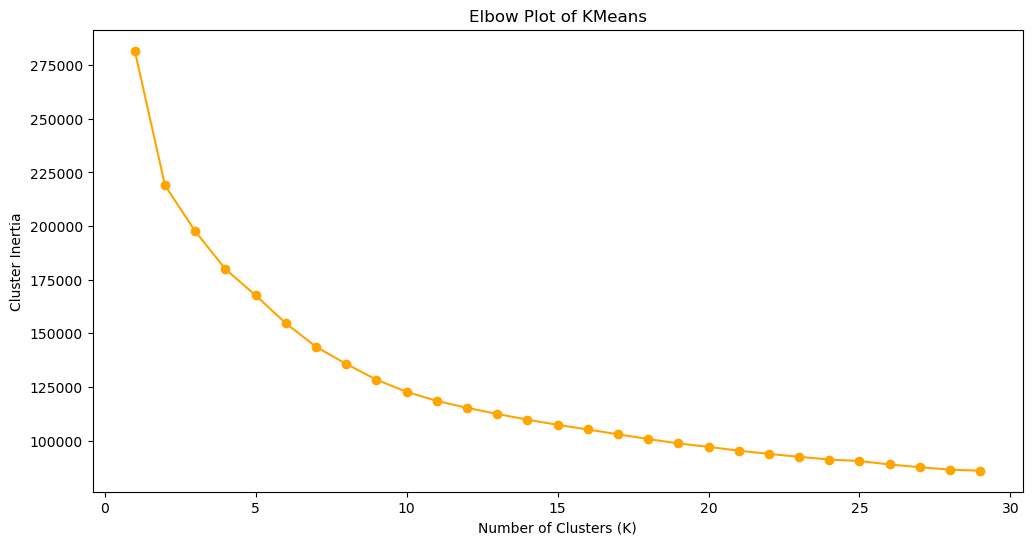

In [25]:
clusters_centers, k_values = find_best_clusters(scaled_data, 30)

generate_elbow_plot(clusters_centers, k_values)

In [26]:
kmeans_model = KMeans(n_clusters = 12)

kmeans_model.fit(scaled_data)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12)

In [27]:
df_test['target'] =  kmeans_model.labels_

C:\Users\johan\AppData\Local\Temp\ipykernel_16300\3012768525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['target'] =  kmeans_model.labels_


In [28]:
#maybe delete audiobooks. we will see
non_v = list(df_join[df_join.speechiness >= 0.93]['playlist'].unique())

In [459]:
def save_df_to_csv(df_join, df_test):
    df_join.to_csv('Joined.csv',index=False)
    df_test.to_csv('test.csv',index=False)

In [460]:
save_df_to_csv(df_join, df_test)

## Normalize dataset

In [29]:
def get_normalized_X_y(df_test):
    df_test.dropna(inplace=True)
    scaler = StandardScaler()
    scaler.fit(df_test.drop('target', axis=1))
    scaled_features = scaler.transform(df_test.drop('target',axis=1))
    df_test_feat = pd.DataFrame(scaled_features, columns = df_test.columns[:-1])
    y = df_test.iloc[:,-1].squeeze()
    X = df_test_feat
    return X, y

In [30]:
X,y = get_normalized_X_y(df_test)

C:\Users\johan\AppData\Local\Temp\ipykernel_16300\3585950954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace=True)


In [31]:
def train_test_data (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_data(X,y)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((23478, 9), (7827, 9), (23478,), (7827,))

In [32]:
def knn_trainer(X_train, y_train, n):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)

    return knn
knn = knn_trainer(X_train, y_train, n= 7)

### Create Pickle File

In [456]:
def create_pickle(knn):
    knnPickle = open('knn_pickle_file', 'wb')
    pickle.dump(knn, knnPickle)
    knnPickle.close()

In [458]:
create_pickle(knn)

### Stuff for Testing

In [454]:
knnPickle = open('knn_pickle_file', 'wb')

In [455]:
# source, destination
pickle.dump(knn, knnPickle)

# close the file
knnPickle.close()

In [449]:
knn.predict(X_test)

array([40., 40., 40., ..., 40., 40., 40.])

In [450]:
knn.score(X_test, y_test)

0.9063498147438355

In [33]:
a = []

for n in range(1,50):
    knn = knn_trainer(X_train, y_train,n)
    i = knn.score(X_test, y_test)
    a.append(i)

<Axes: >

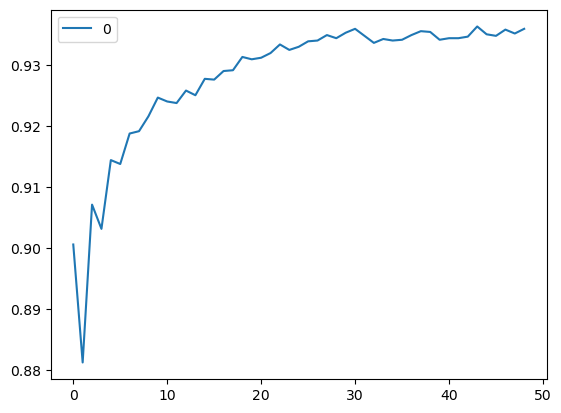

In [41]:
pd.DataFrame(a).plot()

Take n = 20 as knn Classifier